##### importing the necessary libraries for EDA and prediction

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

##### loading the dataset with the help of pandas library and viewing the first 5 rows of the data

In [43]:
df= pd.read_csv(r"Companies-profit.csv")
df.head(5)

,R&D Spend,Administration,Marketing Spend,City,Profit
0,165349.20,136897.80,471784.10,Mumbai,192261.83
1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,153441.51,101145.55,407934.54,Delhi,191050.39
3,144372.41,118671.85,383199.62,Mumbai,182901.99
4,142107.34,91391.77,366168.42,Delhi,166187.94


###### checking the data types of the columns/features

In [44]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
City                object
Profit             float64
dtype: object

###### so here we can see that we have 4 features as type float and one feature that is city as object type. So first we will chekc for any null values and try to eliminate the same and then after we will be preprocessing the object column and change it to one hot encoded form. The reason for changing the column to one hot encoded form is because the categories within the object column are nominal in nature that is donot possess any kinf of relationship with each other. If the categories would have been of ordinal type then we would have chosen label encoding.

In [45]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
City               0
Profit             0
dtype: int64

##### so we can see that there are no null values in the dataset so let's visualize the data and then one hot encode the cat column

In [46]:
df.head()

,R&D Spend,Administration,Marketing Spend,City,Profit
0,165349.20,136897.80,471784.10,Mumbai,192261.83
1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,153441.51,101145.55,407934.54,Delhi,191050.39
3,144372.41,118671.85,383199.62,Mumbai,182901.99
4,142107.34,91391.77,366168.42,Delhi,166187.94


##### multivariate analysis using scatter plot for detecting outliers and relations

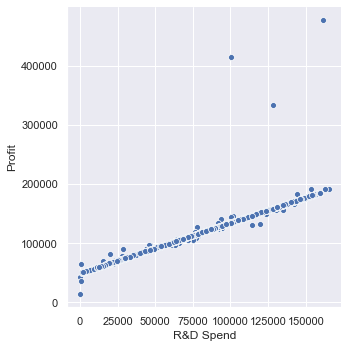

In [183]:
sns.relplot(x="R&D Spend", y="Profit", data=df)

##### here above we can see that RD Spend and Profit are linearly related to each other

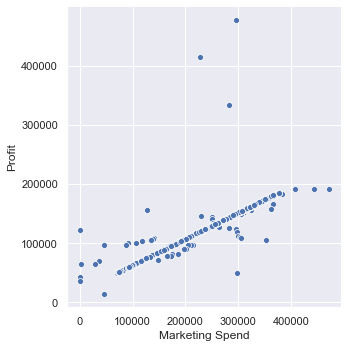

In [48]:
sns.relplot(x="Marketing Spend", y= "Profit", data=df)

##### here also the graph of the Marketing spend and Profit are nearly linearly related to each other 

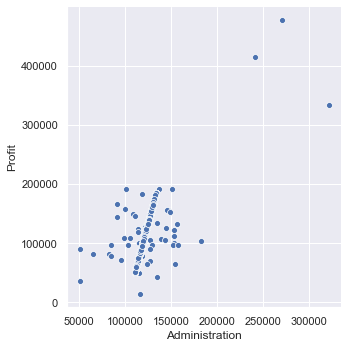

In [49]:
sns.relplot(x="Administration", y="Profit", data=df)

##### here also we can see that most of the data is linearly related with the target but there are a few outliers in the dataset that needs to be dealt with

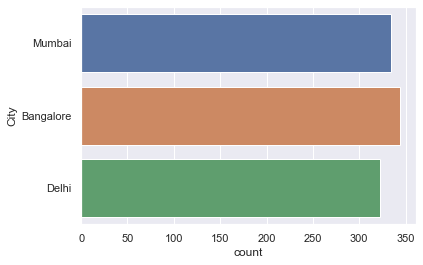

In [71]:
sns.countplot(y="City", data=df)

##### here we can see that Bangalore city has the highest frequency compared to the other two and therefore the spent on research, marketing and administration is more in Bangalore

In [51]:
df.head()

,R&D Spend,Administration,Marketing Spend,City,Profit
0,165349.20,136897.80,471784.10,Mumbai,192261.83
1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,153441.51,101145.55,407934.54,Delhi,191050.39
3,144372.41,118671.85,383199.62,Mumbai,182901.99
4,142107.34,91391.77,366168.42,Delhi,166187.94


In [67]:
df.City.value_counts()

Bangalore    344
Mumbai       334
Delhi        322
Name: City, dtype: int64

In [59]:
df.shape

(1000, 5)

##### one hot encoding the categorical feature

In [86]:
df_new_1= pd.get_dummies(df, drop_first=True)

In [87]:
df_new_1.head()

,R&D Spend,Administration,Marketing Spend,Profit,City_Delhi,City_Mumbai
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [57]:
from scipy import stats

##### using z score analysis to remove the outliers which is actually distributing the data into the standard normal distribution where mean will be zero and standard deviation 1. Here we will neglect those values which fall outside the third standard deviation for both positive and negative ranges

In [88]:
z = np.abs(stats.zscore(df_new_1))
print(z)

[[1.79902277e+00 1.10519698e+00 2.68296826e+00 1.69630142e+00
  6.89148934e-01 1.41209489e+00]
 [1.73986891e+00 2.25369218e+00 2.37831645e+00 1.68534269e+00
  6.89148934e-01 7.08167707e-01]
 [1.54302211e+00 1.73056845e+00 1.98540734e+00 1.66804111e+00
  1.45106515e+00 7.08167707e-01]
 ...
 [4.00017747e-01 9.43575567e+00 1.02451111e-02 6.86796488e+00
  6.89148934e-01 7.08167707e-01]
 [1.00586937e+00 1.57593787e+01 6.06202226e-01 5.00186867e+00
  6.89148934e-01 7.08167707e-01]
 [1.70942709e+00 1.17370268e+01 7.56420302e-01 8.32663195e+00
  6.89148934e-01 1.41209489e+00]]


In [89]:
threshold = 3
print(np.where(z > 3))

(array([ 28,  35,  37,  38,  39,  41,  48, 997, 997, 998, 998, 999, 999],
      dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3], dtype=int64))


##### here we can clearly see that Administration and Profit contained outliers and therefore we need to remove them so as to increase the accuracy of our model

In [90]:
print(z[28][1])

4.733777442025808


##### The data point of 28th row and 1st column is an outlier and so on

##### getting the new dataset without outliers

In [91]:
df_new_1 = df_new_1[(z < 3).all(axis=1)]

In [92]:
df_new_1.shape

(990, 6)

In [159]:
X= df_new_1.drop("Profit", axis=1)
y= df_new_1.Profit

In [160]:
X.head()

,R&D Spend,Administration,Marketing Spend,City_Delhi,City_Mumbai
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [161]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

##### normalizing the dataset so that there is improved accuracy and elimination of feature dominancy

##### When you’re working with a learning model, it is important to scale the features to a range which is centered around zero. This is done so that the variance of the features are in the same range. If a feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset, which is not something we want happening in our model.

In [162]:
scaler= StandardScaler()

In [163]:
X_new= scaler.fit_transform(X)

In [164]:
X_new

array([[ 1.79726098,  1.7894786 ,  2.67785239, -0.69109474,  1.41421356],
       [ 1.73803392,  3.62127829,  2.37326491, -0.69109474, -0.70710678],
       [ 1.54094353, -2.73344338,  1.98043875,  1.44697961, -0.70710678],
       ...,
       [ 0.33051784,  0.26070871,  0.32465188, -0.69109474,  1.41421356],
       [-0.59666603, -0.54405059, -0.5831543 , -0.69109474, -0.70710678],
       [ 1.14333741,  0.96620427,  1.12048392, -0.69109474, -0.70710678]])

In [165]:
y= np.array(y)

In [166]:
y.shape, X_new.shape

((990,), (990, 5))

##### so we have successfully removed 10 outliers from our dataset and now we are good to go to the splitting part

In [167]:
X_train,X_test,y_train,y_test= train_test_split(X_new,y,test_size=0.25, random_state=42)

In [168]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((742, 5), (248, 5), (742,), (248,))

###### Using Linear Regression as our data is linearly related with the target as per the data visualization

In [169]:
model= LinearRegression()

In [170]:
model.fit(X_train,y_train)

LinearRegression()

In [171]:
y_pred= model.predict(X_test)

In [180]:
y_pred

array([ 65931.39112338, 116497.11364739, 139490.96243102, 159461.19309624,
       167393.80521003, 181906.86733382,  82522.67551701, 122232.94944966,
        68609.76044906, 138553.52002823, 171130.65289025, 157505.70743024,
       181564.35196996,  56863.02759077,  71699.44816002,  65761.89312277,
        50343.61872593, 157941.13341629,  67368.02518519, 141344.9807659 ,
        94252.31277389, 103085.87215358,  70178.54260487,  84758.26868048,
        99864.79980604,  93220.25017927,  87062.75619636, 180513.82706411,
        91147.40810264, 100362.28190478, 148104.83439321, 130620.05313538,
       127207.16716742, 178555.86838472,  98339.52901737, 144758.97303173,
       120300.29133563,  58524.72037619,  61197.36665734,  65178.32973555,
       110344.91743776, 109972.02155734,  96694.61449345, 111207.39069862,
       136324.08857836, 110177.3805141 , 100469.3898489 , 103349.39598243,
       152231.20144178, 169606.83124421, 133781.88522838,  91930.72964789,
       140503.61659499,  

##### getting the R squared value to check the goodness of our model

In [179]:
r2_score(y_test,y_pred)

0.9982340461559971

##### here we can see a good R2 square value which is near to 1 and therefore our model is a very good model to make predictions in case of Linear Regression.

In [181]:
data= pd.DataFrame({"predicted":y_pred,"actual":y_test})

In [184]:
data.head()

,predicted,actual
0,65931.391123,66007.66868
1,116497.113647,116529.60610
2,139490.962431,139555.32140
3,159461.193096,159514.13070
4,167393.805210,167412.05440


##### Saving the model as a pickle file for serialization

In [188]:
!pip install joblib

In [190]:
import joblib

In [191]:
joblib.dump(model, 'company_profit_predicted.pkl')

['company_profit_predicted.pkl']

##### by using pickling we can actually save the trained model and use it for future predictions without retraining the model again and again. The way to load this pickle file and then use it for prediciton purpose is given below

In [192]:
from_joblib = joblib.load('company_profit_predicted.pkl')

In [193]:
from_joblib.predict(X_test)

array([ 65931.39112338, 116497.11364739, 139490.96243102, 159461.19309624,
       167393.80521003, 181906.86733382,  82522.67551701, 122232.94944966,
        68609.76044906, 138553.52002823, 171130.65289025, 157505.70743024,
       181564.35196996,  56863.02759077,  71699.44816002,  65761.89312277,
        50343.61872593, 157941.13341629,  67368.02518519, 141344.9807659 ,
        94252.31277389, 103085.87215358,  70178.54260487,  84758.26868048,
        99864.79980604,  93220.25017927,  87062.75619636, 180513.82706411,
        91147.40810264, 100362.28190478, 148104.83439321, 130620.05313538,
       127207.16716742, 178555.86838472,  98339.52901737, 144758.97303173,
       120300.29133563,  58524.72037619,  61197.36665734,  65178.32973555,
       110344.91743776, 109972.02155734,  96694.61449345, 111207.39069862,
       136324.08857836, 110177.3805141 , 100469.3898489 , 103349.39598243,
       152231.20144178, 169606.83124421, 133781.88522838,  91930.72964789,
       140503.61659499,  